In [42]:
from lcs.agents.facs2 import fACS2, Configuration
from lcs.agents.facs2.adapters.WoodsFuzzyEnvironmentAdapter import WoodsFuzzyEnvironmentAdapter
from lcs.agents.facs2.adapters.Mazev2FuzzyEnvironmentAdapter import Mazev2FuzzyEnvironmentAdapter
from lcs.metrics import population_metrics
import gym
import gym_maze
import gym_woods
import logging

import pandas as pd
import numpy as np
from scipy.misc import face

logging.basicConfig(level=logging.INFO)

def _maze_knowledge(population, environment) -> float:
    # zazanczyć poprawki do podanej metryki knowledge!!!!!!
    
    transitions = environment.env.get_transitions()

    # Take into consideration only reliable classifiers
    reliable_classifiers = [c for c in population if c.is_reliable()]

    print(len(reliable_classifiers))

    # Count how many transitions are anticipated correctly
    nr_correct = 0

    # For all possible destinations from each path cell
    for start, action, end in transitions:

        p0 = environment.env.maze.perception(start)
        p1 = environment.env.maze.perception(end)

        if any([True for cl in reliable_classifiers
                #if cl.predicts_successfully(p0, action, p1)]):
                if cl.does_match(p0) and cl.action == action]):
            nr_correct += 1

    return nr_correct / len(transitions) * 100.0


def basic_metrics(agent, env):
    pop = agent.population
    metrics = population_metrics(pop, env)
    return metrics

def _maze_metrics(agent, env):
    pop = agent.population
    metrics = {
        'knowledge': _maze_knowledge(pop, env)
    }

    # Add basic population metrics
    metrics.update(population_metrics(pop, env))
    
    return metrics

cfg_lin_2 = Configuration(
    classifier_length=Mazev2FuzzyEnvironmentAdapter.condition_length,
    number_of_possible_actions=8,
    epsilon=0.9,
    user_metrics_collector_fcn=_maze_metrics,
    aggregation_method='sum_to_two',
    fuzzy_function='linear',
    do_ga=True
    )

cfg_lin_3 = Configuration(
    classifier_length=9,#Mazev2FuzzyEnvironmentAdapter.condition_length,
    number_of_possible_actions=8,
    epsilon=0.9,
    user_metrics_collector_fcn=_maze_metrics,
    aggregation_method='sum_to_three',
    fuzzy_function='linear',
    do_ga=True
    )

cfg_sig_2 = Configuration(
    classifier_length=Mazev2FuzzyEnvironmentAdapter.condition_length,
    number_of_possible_actions=8,
    epsilon=0.9,
    user_metrics_collector_fcn=_maze_metrics,
    aggregation_method='sum_to_two',
    #theta_r=0.1,
    fuzzy_function='sigmoid',
    do_ga=True
    )

cfg_sig_3 = Configuration(
    classifier_length=9,#Mazev2FuzzyEnvironmentAdapter.condition_length,
    number_of_possible_actions=8,
    epsilon=0.9,
    user_metrics_collector_fcn=_maze_metrics,
    aggregation_method='sum_to_three',
    fuzzy_function='sigmoid'
    #do_ga=True
    )


environment_name = 'MazeF2-v0'
env = Mazev2FuzzyEnvironmentAdapter(gym.make(environment_name))

trial = 150
repeats = 10


In [43]:
def calculate_step_mean(arr, step:int=3):
    len = arr.size-1
    new_arr = []
    new_arr.append(arr[0])
    for i in range(1,len): 
        #print(arr[i-1:i+2:1])   
        new_arr.append(np.mean(arr[i-1:i+2:1]))

    new_arr.append(arr[-1])
    return new_arr

#calculate_step_mean(np.array([1,2,10,3,4,7,15,2,8]))

In [44]:
def make_experiment(cfg, env, trial, repeats):
    logging.basicConfig(level=logging.INFO)
    agent = fACS2(cfg)

    gen_pop = []#np.array([])
    gen_rel = []#np.array([])

    for i in range(repeats):
        pop = []
        rel = []
        agent_explore = agent.explore(env, trial)

        print(agent_explore)

        for j in range(trial):
            pop.append(agent_explore[j]['population'])
            rel.append(agent_explore[j]['reliable'])

        pop = np.array(pop)
        rel = np.array(rel)

        pop = calculate_step_mean(pop)
        rel = calculate_step_mean(rel)

        gen_pop.append(pop)
        gen_rel.append(rel)

        logging.info(f'Repeats {i} of {repeats-1}')
        #print(f'Repeats {i} of {repeats}')

    return np.array(gen_pop).mean(axis=0), np.array(gen_rel).mean(axis=0)

    #gen_pop_mean_lin_2 = np.array(gen_pop).mean(axis=0)
    #gen_rel_mean_lin_2 = np.array(gen_rel).mean(axis=0)

In [45]:
pop_sig_3, rel_sig_3 = make_experiment(cfg_sig_3,env,10,1)
#pop_sig_3 = np.load('pop_sig_3.npy')
#rel_sig_3 = np.load('rel_sig_3.npy')

INFO:lcs.agents.Agent:{'trial': 1, 'steps_in_trial': 28, 'reward': 1000, 'perf_time': 0.13120250098290853, 'knowledge': 0.0, 'population': 18, 'numerosity': 18, 'reliable': 0}


sigmoid
0


INFO:lcs.agents.Agent:{'trial': 2, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.46165049899718724, 'knowledge': 0.0, 'population': 65, 'numerosity': 65, 'reliable': 0}


0


INFO:lcs.agents.Agent:{'trial': 3, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.9321760290185921, 'knowledge': 0.0, 'population': 183, 'numerosity': 183, 'reliable': 0}


0


INFO:lcs.agents.Agent:{'trial': 4, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 2.4645574299793225, 'knowledge': 23.52941176470588, 'population': 380, 'numerosity': 380, 'reliable': 2}


2


INFO:lcs.agents.Agent:{'trial': 5, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 4.9055060139799025, 'knowledge': 17.647058823529413, 'population': 646, 'numerosity': 646, 'reliable': 2}


2


INFO:lcs.agents.Agent:{'trial': 6, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 7.1970359990082216, 'knowledge': 11.76470588235294, 'population': 907, 'numerosity': 907, 'reliable': 3}


3


INFO:lcs.agents.Agent:{'trial': 7, 'steps_in_trial': 27, 'reward': 1000, 'perf_time': 3.643234646995552, 'knowledge': 47.05882352941176, 'population': 1091, 'numerosity': 1091, 'reliable': 7}


7


INFO:lcs.agents.Agent:{'trial': 8, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 15.485156713984907, 'knowledge': 41.17647058823529, 'population': 1321, 'numerosity': 1321, 'reliable': 15}


15


INFO:lcs.agents.Agent:{'trial': 9, 'steps_in_trial': 4, 'reward': 1000, 'perf_time': 1.15545461900183, 'knowledge': 41.17647058823529, 'population': 1371, 'numerosity': 1371, 'reliable': 19}


19


INFO:lcs.agents.Agent:{'trial': 10, 'steps_in_trial': 9, 'reward': 1000, 'perf_time': 1.3665370719972998, 'knowledge': 47.05882352941176, 'population': 1438, 'numerosity': 1438, 'reliable': 21}
INFO:root:Repeats 0 of 0


21
[{'trial': 1, 'steps_in_trial': 28, 'reward': 1000, 'perf_time': 0.13120250098290853, 'knowledge': 0.0, 'population': 18, 'numerosity': 18, 'reliable': 0}, {'trial': 2, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.46165049899718724, 'knowledge': 0.0, 'population': 65, 'numerosity': 65, 'reliable': 0}, {'trial': 3, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.9321760290185921, 'knowledge': 0.0, 'population': 183, 'numerosity': 183, 'reliable': 0}, {'trial': 4, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 2.4645574299793225, 'knowledge': 23.52941176470588, 'population': 380, 'numerosity': 380, 'reliable': 2}, {'trial': 5, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 4.9055060139799025, 'knowledge': 17.647058823529413, 'population': 646, 'numerosity': 646, 'reliable': 2}, {'trial': 6, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 7.1970359990082216, 'knowledge': 11.76470588235294, 'population': 907, 'numerosity': 907, 'reliable': 3}, {'trial': 7, 'steps_in_trial': 27,

In [29]:

#pop_lin_2, rel_lin_2 = make_experiment(cfg_lin_2,env,150,10)
pop_lin_2 = np.load('pop_lin_2.npy')
rel_lin_2 = np.load('rel_lin_2.npy')

In [30]:
#pop_lin_3, rel_lin_3 = make_experiment(cfg_lin_3,env,150,10)
pop_lin_3 = np.load('pop_lin_3.npy')
rel_lin_3 = np.load('rel_lin_3.npy')

In [31]:
#pop_sig_2, rel_sig_2 = make_experiment(cfg_sig_2,env,150,10)
pop_sig_2 = np.load('pop_sig_2.npy')
rel_sig_2 = np.load('rel_sig_2.npy')

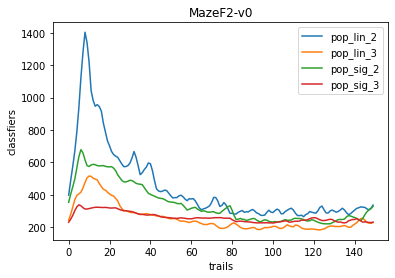

In [32]:
import matplotlib.pyplot as plt
linspace = np.arange(0,150,1)
plt.title(environment_name)
plt.xlabel('trails')
plt.ylabel('classfiers')
plt.plot(linspace,pop_lin_2,label="pop_lin_2")
plt.plot(linspace,pop_lin_3,label="pop_lin_3")
plt.plot(linspace,pop_sig_2,label="pop_sig_2")
plt.plot(linspace,pop_sig_3,label="pop_sig_3")

plt.legend(loc="upper right")
plt.show()

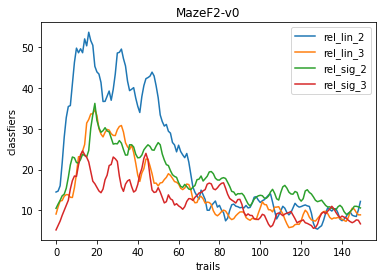

In [33]:
plt.title(environment_name)
plt.xlabel('trails')
plt.ylabel('classfiers')
plt.plot(linspace,rel_lin_2,label="rel_lin_2")
plt.plot(linspace,rel_lin_3,label="rel_lin_3")
plt.plot(linspace,rel_sig_2,label="rel_sig_2")
plt.plot(linspace,rel_sig_3,label="rel_sig_3")

plt.legend(loc="upper right")
plt.show()

# Podpisać osie.
# Tytuł wykresu - środowisko.

# Metryka knowledge - sprawdzić i zaimplementować (w artykule było) 
# W labiryncie
# % klasyfikatorów opisuje 
# Wykres knowledge 

# Przeprowadzić eksperymenty dla innych środowisk np. Maze5, Woods


In [18]:
np.save('rel_lin_2.npy', rel_lin_2)
np.save('rel_lin_3.npy', rel_lin_3)
np.save('rel_sig_2.npy', rel_sig_2)
np.save('rel_sig_3.npy', rel_sig_3)



In [19]:
np.save('pop_lin_2.npy', pop_lin_2)
np.save('pop_lin_3.npy', pop_lin_3)
np.save('pop_sig_2.npy', pop_sig_2)
np.save('pop_sig_3.npy', pop_sig_3)